In [3]:
import nltk
nltk.download('punkt') #recognizes punctuation.
nltk.download('averaged_perceptron_tagger') #default part of speech tagger for NLTK.
nltk.download('maxent_ne_chunker') #Named Entity Chunker for NLTK. 
nltk.download('words') #NLTK corpus of words.
##!pip install spacy
#!python -m spacy download en_core_web_sm
import nltk
nltk.download('omw-1.4')
#!pip3 install textblob
#pip install -U pip pattern
#-m pip install textblob
from textblob import TextBlob
from pattern.en import sentiment
from wordcloud import WordCloud

import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
import asyncio
import aiohttp
import json
#pip install pattern
#pip install -U textblob
#!pip3 install pattern
#!pip3 install wordcloud
#!pip install -U pip wordcloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
pip install pattern

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.2 MB 11.0 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 81 kB 9.7 MB/s 
     |████████████████████████████████| 5.6 MB 59.7 MB/s 
     |████████████████████████████████| 5.6 MB 48.8 MB/s 
     |████████████████████████████████| 348 kB 58.5 MB/s 
     |████████████████████████████████| 104 kB 63.6 MB/s 
     |████████████████████████████████| 4.1 MB 36.3 MB/s 
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332721 sha256=6572d779b53d3600e204dcb9480c169853a133d2d17ee9793d07cf8fc013a203
  Stored in directory: /root/.cache/pip/wheels/8d/1f/4e/9b67afd2430d55dee90bd57618dd7d899f1323e5852c465682
  Created wheel for mysqlclient: filename=mysqlclient-2.1.1-cp37-cp37m-linux_x86_64.whl size=99984 sha256=9fe583cd14eaac7eface7a4985ad84a8e5c8c75734aef19ddd604e2aa195d529
  Stored 

In [4]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [5]:
 
text ="Mining and resources companies were given an extraordinary level of access to the highest rungs of the New South Wales government in the past four years, securing roughly 188 meetings with ministers in 235 weeks. An analysis of four and a half years of the state’s ministerial diaries shows the NSW Minerals Council has obtained regular access to resources, planning and finance ministers, and the offices of premiers and deputy premiers. The council was given 61 meetings with NSW ministers, more than anyone except the NSW Farmers Association, the City of Sydney council and Penrith city council. Further meetings were granted to multinational resource and energy companies such as Shenhua, Whitehaven, Glencore, AGL, Rio Tinto, BHP, Origin Energy, Santos, Anglo American and Centennial Coal."
 
tokenized = nltk.word_tokenize(text)
pos_tagged = nltk.pos_tag(tokenized)
chunks = nltk.ne_chunk(pos_tagged)
for chunk in chunks:
    if hasattr(chunk, 'label'):
        print(chunk)

(GPE Mining/NN)
(ORGANIZATION New/NNP South/NNP Wales/NNP)
(ORGANIZATION NSW/NNP Minerals/NNP Council/NNP)
(ORGANIZATION NSW/NNP)
(ORGANIZATION NSW/NNP Farmers/NNP Association/NNP)
(ORGANIZATION City/NNP)
(GPE Sydney/NNP)
(GPE Penrith/NNP)
(ORGANIZATION Shenhua/NNP)
(GPE Whitehaven/NNP)
(PERSON Glencore/NNP)
(ORGANIZATION AGL/NNP)
(PERSON Rio/NNP Tinto/NNP)
(ORGANIZATION BHP/NNP)
(PERSON Origin/NNP Energy/NNP)
(GPE Santos/NNP)
(PERSON Anglo/NNP American/NNP)
(ORGANIZATION Centennial/NNP Coal/NNP)


# Using guardian API

#### For Mining Companies NSW

In [6]:
guardian_api_key = "231ce917-65b5-4019-b365-c79f213379d1&q=mining-companies-nsw"
import requests as r
response = r.get(f'https://content.guardianapis.com/search?section=australia-news&q=xstrata&api-key={guardian_api_key}')
data = response.json()
data

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 11221,
  'startIndex': 1,
  'pageSize': 10,
  'currentPage': 1,
  'pages': 1123,
  'orderBy': 'relevance',
  'results': [{'id': 'australia-news/2022/aug/24/pay-up-mining-and-gambling-companies-told-not-to-expect-sympathy-over-queensland-tax-hikes',
    'type': 'article',
    'sectionId': 'australia-news',
    'sectionName': 'Australia news',
    'webPublicationDate': '2022-08-23T17:30:12Z',
    'webTitle': 'Pay up: mining and gambling companies told not to expect sympathy over Queensland tax hikes',
    'webUrl': 'https://www.theguardian.com/australia-news/2022/aug/24/pay-up-mining-and-gambling-companies-told-not-to-expect-sympathy-over-queensland-tax-hikes',
    'apiUrl': 'https://content.guardianapis.com/australia-news/2022/aug/24/pay-up-mining-and-gambling-companies-told-not-to-expect-sympathy-over-queensland-tax-hikes',
    'isHosted': False,
    'pillarId': 'pillar/news',
    'pillarName': 'News'},
   {'id': 'aust

In [ ]:
article_content = r.get(f'{data["response"]["results"][0]["apiUrl"]}?api-key={guardian_api_key}&show-fields=bodyText')
article_content.json()

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 1,
  'content': {'id': 'australia-news/2022/aug/24/pay-up-mining-and-gambling-companies-told-not-to-expect-sympathy-over-queensland-tax-hikes',
   'type': 'article',
   'sectionId': 'australia-news',
   'sectionName': 'Australia news',
   'webPublicationDate': '2022-08-23T17:30:12Z',
   'webTitle': 'Pay up: mining and gambling companies told not to expect sympathy over Queensland tax hikes',
   'webUrl': 'https://www.theguardian.com/australia-news/2022/aug/24/pay-up-mining-and-gambling-companies-told-not-to-expect-sympathy-over-queensland-tax-hikes',
   'apiUrl': 'https://content.guardianapis.com/australia-news/2022/aug/24/pay-up-mining-and-gambling-companies-told-not-to-expect-sympathy-over-queensland-tax-hikes',
   'fields': {'bodyText': 'Resources and gambling companies have been told to “pull their head in” and not expect public sympathy after taking high-profile actions to resist recent tax increases by the Queens

##### Body_text data


In [7]:
# Creating a loop
text_info = []
for article in data["response"]["results"]:
    url= (f'{article["apiUrl"]}?api-key={guardian_api_key}&show-fields=bodyText')
    article_content= r.get(url).json()
    body_text= article_content["response"]['content']['fields']['bodyText']
    text_info.append(body_text)


In [34]:
print(text_info[2])

Mining giant Glencore has launched an extraordinary public attack on two Indigenous people who are seeking to stop the company destroying the site of an Aboriginal massacre in New South Wales. Scott Franks and Robert Lester identify as Wonnarua people, the traditional landowners in the Upper Hunter. They have applied to protect Aboriginal massacre sites at the historic Ravensworth Homestead and surrounding lands near Singleton. In an advertisement in the community newspaper Hunter River Times on 5 November, Glencore named Franks and Lester, stating that they are “seeking to stop our project”. It alleges “independent studies of the written histories, including thorough investigation by a local historian, indicate that the September 1826 massacre in question occurred more than 20km away from the homestead site”. The advertisement is a controversial intervention, coming after the public opprobrium experienced by mining company Rio Tinto after the destruction of the Juukan Gorge rock shelt

In [8]:
tokenized = nltk.word_tokenize(str(text_info))
pos_tagged = nltk.pos_tag(tokenized)
chunks = nltk.ne_chunk(pos_tagged)
for chunk in chunks:
    if hasattr(chunk, 'label'):
        print(chunk)

(GPE Queensland/NNP)
(ORGANIZATION BHP/NNP)
(PERSON Mike/NNP Henry/NNP)
(GPE South/NNP)
(PERSON Henry/NNP)
(GPE Queensland/NNP)
(ORGANIZATION BHP/NNP)
(GPE Queensland/NNP)
(PERSON Ian/NNP Macfarlane/NNP)
(ORGANIZATION Queensland/NNP Resources/NNPS Council/NNP)
(PERSON Cameron/NNP Dick/NNP)
(PERSON Queensland/NNP Conservation/NNP Council/NNP)
(PERSON Dave/NNP Copeman/NNP)
(GPE Queensland/NNP)
(PERSON Ladbrokes/NNS)
(GPE Queensland/NNP)
(ORGANIZATION Brisbane/NNP Broncos/NNP)
(PERSON Sportsbet/NNP)
(PERSON Racing/NNP Queensland/NNP)
(PERSON John/NNP Quiggin/NNP)
(ORGANIZATION University/NNP)
(GPE Queensland/NNP)
(PERSON Quiggin/NNP)
(PERSON Tim/NNP Costello/NNP)
(PERSON Reform/NNP)
(GPE Australia/NNP)
(PERSON Costello/NNP)
(GPE Queensland/NNP)
(PERSON Macfarlane/NNP)
(PERSON Guardian/JJ Australia/NNP)
(ORGANIZATION BHP/NNP)
(PERSON Sportsbet/NNP)
(PERSON Ladbrokes/NNP)
(GPE Australia/NNP)
(PERSON Lifeline/NNP)
(PERSON Help/NNP Online/NNP)
(ORGANIZATION National/NNP Debt/NNP Helpline/NNP)

#### NSW Minerals Council

In [9]:
guardian_api_key = "231ce917-65b5-4019-b365-c79f213379d1&q=NSW-minerals-council"
import requests as r

response = r.get(f'https://content.guardianapis.com/search?section=australia-news&q=xstrata&api-key={guardian_api_key}')
data_nsw_council = response.json()
data_nsw_council

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 10679,
  'startIndex': 1,
  'pageSize': 10,
  'currentPage': 1,
  'pages': 1068,
  'orderBy': 'relevance',
  'results': [{'id': 'australia-news/2022/oct/07/nsw-councils-call-for-funding-boost-for-rain-related-repairs-or-they-will-start-closing-roads',
    'type': 'article',
    'sectionId': 'australia-news',
    'sectionName': 'Australia news',
    'webPublicationDate': '2022-10-06T23:23:46Z',
    'webTitle': 'NSW councils call for funding boost for rain-related repairs or they will ‘start closing roads’',
    'webUrl': 'https://www.theguardian.com/australia-news/2022/oct/07/nsw-councils-call-for-funding-boost-for-rain-related-repairs-or-they-will-start-closing-roads',
    'apiUrl': 'https://content.guardianapis.com/australia-news/2022/oct/07/nsw-councils-call-for-funding-boost-for-rain-related-repairs-or-they-will-start-closing-roads',
    'isHosted': False,
    'pillarId': 'pillar/news',
    'pillarName': 'News'},
  

In [10]:
# Creating a loop
info_council = []
for article in data_nsw_council["response"]["results"]:
    url= (f'{article["apiUrl"]}?api-key={guardian_api_key}&show-fields=bodyText')
    article_content= r.get(url).json()
    body_text= article_content["response"]['content']['fields']['bodyText']
    info_council.append(body_text)
    

In [11]:
#Convert data type
info_council= str(info_council) 

In [12]:
tokenized = nltk.word_tokenize(info_council)
pos_tagged = nltk.pos_tag(tokenized)
chunks = nltk.ne_chunk(pos_tagged)
for chunk in chunks:
    if hasattr(chunk, 'label'):
        print(chunk)

(GPE New/NNP South/NNP Wales/NNP)
(PERSON Blue/NNP Mountains/NNP)
(PERSON Mark/NNP Greenhill/NNP)
(PERSON Greenhill/NNP)
(ORGANIZATION NSW/NNP)
(PERSON Greenhill/NNP)
(ORGANIZATION NSW/NNP)
(PERSON Local/JJ Government/NNP)
(PERSON Darriea/NNP Turley/NNP)
(ORGANIZATION LGAs/NNP)
(ORGANIZATION NSW/NNP)
(PERSON Turley/NNP)
(PERSON March/NNP)
(PERSON Turley/NNP)
(ORGANIZATION NSW/NNP)
(PERSON Brewarrina/NNP)
(ORGANIZATION NSW/NNP)
(PERSON Tim/NNP Williams/NNP)
(PERSON Williams/NNP)
(ORGANIZATION Kamilaroi/NNP Highway/NNP)
(PERSON Williams/NNP)
(GPE Blacktown/NNP)
(PERSON Tony/NNP Bleasdale/NNP)
(PERSON Khal/NNP Asfour/NNP)
(GPE Dutton/NNP)
(ORGANIZATION Liberal/JJ)
(PERSON Dutton/NNP)
(ORGANIZATION Minerals/NNP Council/NNP)
(GPE Australia/NNP)
(PERSON Anthony/NNP Albanese/NNP)
(ORGANIZATION Liberals/NNS)
(PERSON Dutton/NNP)
(PERSON Ted/NNP O/NNP)
(ORGANIZATION Coalition/NN)
(PERSON Dutton/NNP)
(GPE August/NNP)
(ORGANIZATION Liberal/NNP)
(GPE Australia/NNP)
(PERSON Dutton/NNP)
(ORGANIZATION

# Sentiment analysis

In [13]:
#having a look at the text
print(info_council[100:1100])

ost to cover the “beating” they have taken from this year’s record rainfall. The mayor of Blue Mountains council, Mark Greenhill, said extreme weather, including heavy rain, flooding and landslides, had caused $400m worth of damage in the shire – the equivalent of 10 years’ worth of roadworks in 12 months. The council’s total annual income is $90m. Greenhill said the damage was likely to continue with the forecast for heavy rain through spring and summer, which he said would also have a major impact on the council’s ability to conduct repairs. Crews have been working extended hours to patch potholes during downpours. “If we don’t start getting more government funding fast, I’ll be forced to start closing roads,” he said. “If they’re not safe, I can’t put people’s lives at risk. That’s how serious the situation is. “We are all absolutely exhausted by it … on top of record rains, material shortages and sky-rocketing costs, our roads have taken a literal beating that has left one third of

In [14]:
clean_text= info_council.replace("n", " ")
clean_text= info_council.replace("/", " ")       
clean_Text= ''.join([c for c in clean_text if c != "'"])

In [15]:
clean_Text

'[A New South Wales mayor is threatening to close roads if his council does not receive a funding boost to cover the “beating” they have taken from this year’s record rainfall. The mayor of Blue Mountains council, Mark Greenhill, said extreme weather, including heavy rain, flooding and landslides, had caused $400m worth of damage in the shire – the equivalent of 10 years’ worth of roadworks in 12 months. The council’s total annual income is $90m. Greenhill said the damage was likely to continue with the forecast for heavy rain through spring and summer, which he said would also have a major impact on the council’s ability to conduct repairs. Crews have been working extended hours to patch potholes during downpours. “If we don’t start getting more government funding fast, I’ll be forced to start closing roads,” he said. “If they’re not safe, I can’t put people’s lives at risk. That’s how serious the situation is. “We are all absolutely exhausted by it … on top of record rains, material 

In [16]:
#Now, we split the text into individual sentences.
sentence=[]
tokens = nlp(clean_Text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [93]:
sentence

['[Peter Dutton has doubled down on Liberal support for nuclear power, pre-empting a review of its energy policy by arguing nuclear will be needed to support renewables.',
 'Dutton told the Minerals Council on Wednesday that Australia needs a “frank debate” about nuclear energy, suggesting that it has a “wonderful opportunity to add value” to its uranium resources.',
 'The comments sparked a demand from the prime minister, Anthony Albanese, in question time for the Liberals to nominate “where the plants are going to be”.',
 'On Wednesday Dutton confirmed that he appointed Ted O’Brien as shadow energy minister in part because a committee inquiry he chaired in 2019 recommended the partial lifting of the moratorium on nuclear energy to allow for “new and emerging nuclear technologies”.',
 'The Coalition is still reviewing its energy policy to develop an emissions reduction target before the next election and study nuclear energy to develop a “proper base of information”, according to comm

In [17]:
#How many sentences are there in the data?
print(len(sentence))

358


In [18]:
print(sentence[2])

The council’s total annual income is $90m. Greenhill said the damage was likely to continue with the forecast for heavy rain through spring and summer, which he said would also have a major impact on the council’s ability to conduct repairs.


#### Sentiment analysis using textblob

Sentiment Analysis with Textblob
Textblob is a Python library for text processing and NLP. Textblob has built-in functions for performing sentiment analysis. The function returns a score for polarity and subjectivity.

Polarity score can be positive or negative, and Subjectivity varies between 0 and 1.

In [19]:
#create an empty list and get all the data
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [20]:
#convert this list to a data frame
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [21]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,[A New South Wales mayor is threatening to clo...,0.136364,0.454545
1,"The mayor of Blue Mountains council, Mark Gree...",0.055000,0.360000
2,The council’s total annual income is $90m. Gre...,-0.034375,0.687500
3,Crews have been working extended hours to patc...,0.000000,0.000000
4,“If we don’t start getting more government fun...,0.133333,0.433333


In [22]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      358 non-null    object 
 1   Polarity      358 non-null    float64
 2   Subjectivity  358 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.5+ KB


Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

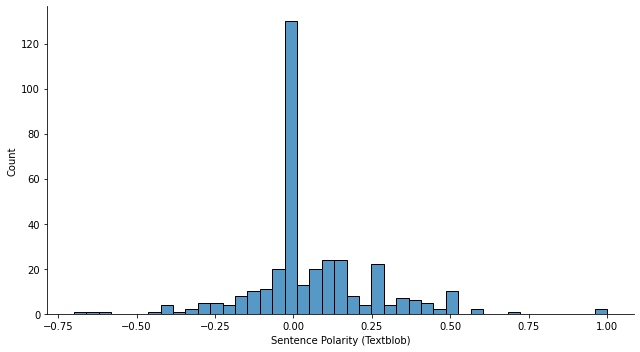

In [23]:
# analyse the sentence polarity
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")


Due to some reason around half the sentences have zero polarity. Maybe, it’s because of the fact that they are neutral. Majority of the sentences are highly positive and a few are negative.

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

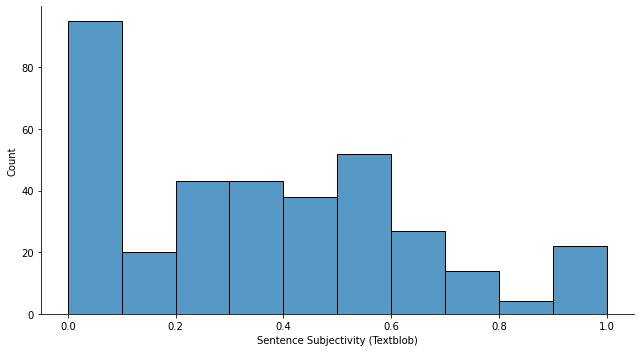

In [24]:
#Examining subjectivity
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

The values of subjectivity also vary, with few sentences being highly subjective and a majority of sentences being less subjective.

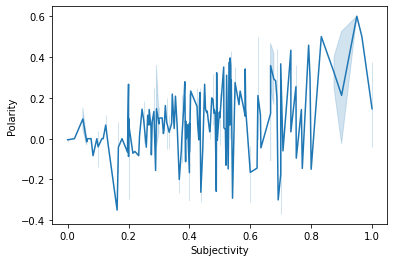

In [26]:
#Plot polarity & subjectivity
sns.set_theme(style="darkgrid")
sns.lineplot(x = "Subjectivity", y = "Polarity", data=df_textblob)

ValueError: ignored

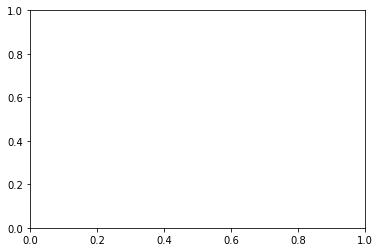

In [25]:
plt.plot('Polarity','Subjectivity',df_textblob)
plt.xlabel("Months since Jan 2019")
plt.ylabel("Polarity Score")
plt.title(f"Mining companies reported in Guardian")
plt.show()

 # Sentiment Analysis with Pattern

In [ ]:
pattern_sentiment=[]
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])

In [ ]:
pattern_sentiment[1]

['BHP’s chief executive, Mike Henry, last week said the mining giant would pause plans for its Blackwater South coalmine because of the state’s new royalty regime, unveiled as part of the June budget.',
 0.04545454545454545,
 0.5070707070707071]

In [ ]:
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [ ]:
df_pattern.head()



,Sentence,Polarity,Subjectivity
0,Resources and gambling companies have been tol...,0.000000,0.158333
1,"BHP’s chief executive, Mike Henry, last week s...",0.045455,0.507071
2,Henry said the royalty changes “didn’t involve...,0.000000,0.000000
3,The move came amid windfall profits for BHP an...,0.000000,0.000000
4,The mine is not expected to open before 2029.,0.025000,0.450000


In [ ]:
df_pattern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      26 non-null     object 
 1   Polarity      26 non-null     float64
 2   Subjectivity  26 non-null     float64
dtypes: float64(2), object(1)
memory usage: 752.0+ bytes


Text(0.5, 6.79999999999999, 'Sentence Polarity (Pattern)')

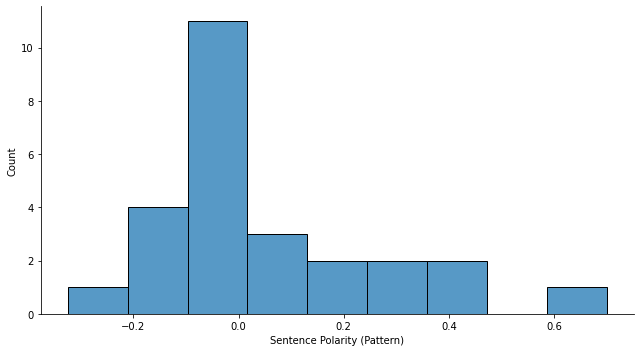

In [ ]:
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Pattern)')

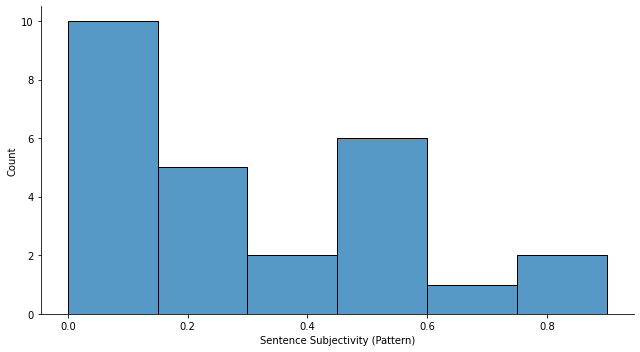

In [ ]:
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")

# Word Frequency and Word Cloud

In [98]:
#Creating the tokenizer
from nltk.tokenize import word_tokenize
word_tokenize(clean_Text)

TypeError: ignored

In [95]:
len(tokens)

10149

In [111]:
#Tokenizing the text
tokens=clean_Text.split()
tokens


['[Peter',
 'Dutton',
 'has',
 'doubled',
 'down',
 'on',
 'Liberal',
 'support',
 'for',
 'nuclear',
 'power,',
 'pre-empting',
 'a',
 'review',
 'of',
 'its',
 'energy',
 'policy',
 'by',
 'arguing',
 'nuclear',
 'will',
 'be',
 'needed',
 'to',
 'support',
 'renewables.',
 'Dutton',
 'told',
 'the',
 'Minerals',
 'Council',
 'on',
 'Wednesday',
 'that',
 'Australia',
 'needs',
 'a',
 '“frank',
 'debate”',
 'about',
 'nuclear',
 'energy,',
 'suggesting',
 'that',
 'it',
 'has',
 'a',
 '“wonderful',
 'opportunity',
 'to',
 'add',
 'value”',
 'to',
 'its',
 'uranium',
 'resources.',
 'The',
 'comments',
 'sparked',
 'a',
 'demand',
 'from',
 'the',
 'prime',
 'minister,',
 'Anthony',
 'Albanese,',
 'in',
 'question',
 'time',
 'for',
 'the',
 'Liberals',
 'to',
 'nominate',
 '“where',
 'the',
 'plants',
 'are',
 'going',
 'to',
 'be”.',
 'On',
 'Wednesday',
 'Dutton',
 'confirmed',
 'that',
 'he',
 'appointed',
 'Ted',
 'O’Brien',
 'as',
 'shadow',
 'energy',
 'minister',
 'in',
 'part

In [112]:
print(tokens[0:10])

['[Peter', 'Dutton', 'has', 'doubled', 'down', 'on', 'Liberal', 'support', 'for', 'nuclear']


In [113]:
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [103]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [114]:
#Appending to words_new all words that are in words but not in sw
words_new = []
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [115]:
len(words_new)

5147

In [116]:
print(words_new[0:10])

['[peter', 'dutton', 'doubled', 'liberal', 'support', 'nuclear', 'power,', 'pre-empting', 'review', 'energy']


In [117]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)

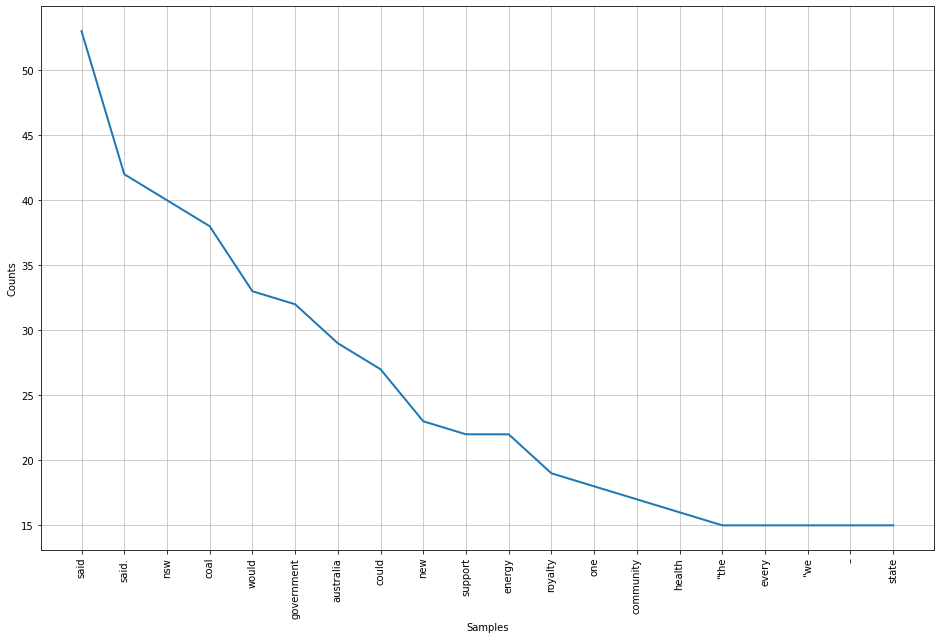

In [118]:
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)

In [109]:
#converting into string
res=' '.join([i for i in words_new if not i.isdigit()])

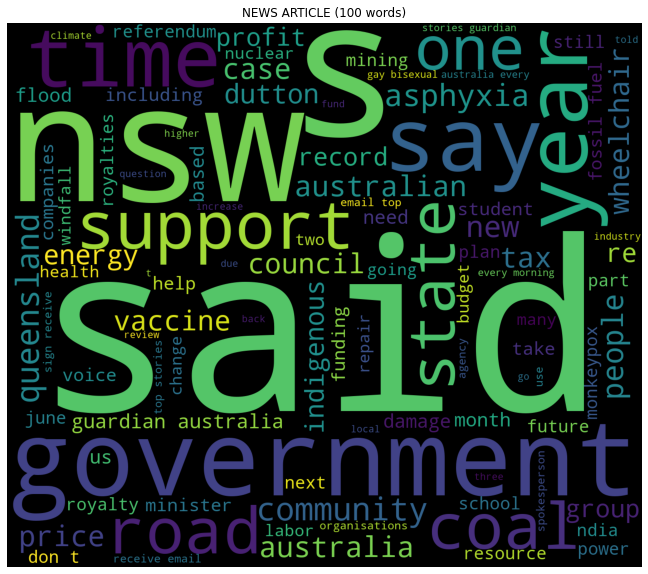

In [110]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

# Comparison of the five companies